<a href="https://colab.research.google.com/github/ActiveStacks/DatasetTwo/blob/main/Final1_EXPERIMENT_GRAPHCODEBERTLLM_2E9ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
#path7 = ('/content/drive/MyDrive/Dataset2/LVDAndro_SourceFiles_Combined_Processed.csv')
# path8 = ('/content/drive/MyDrive/Dataset2/LVDAndro_APKs_Combined_Processed.csv')
path9 = ('/content/drive/MyDrive/Dataset2/LVDAndro_All_Combined_Processed.csv')

In [4]:
df = pd.read_csv(path9)

<ipython-input-4-31de1d26f69d>:1: DtypeWarning: Columns (1,2,3,5,6,8,9,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path9)


In [5]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [6]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [7]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [8]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
14643859,16120997,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
14643860,16120998,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
14643861,16120999,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
14643862,16121000,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
14643863,16121001,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [9]:
df.shape

(14643864, 18)

In [10]:
df.describe()

,index,CVSS,Vulnerability_status
count,1.464386e+07,104664.000000,1.464386e+07
mean,7.532829e+06,6.773909,1.110697e-02
std,4.455136e+06,1.507581,1.048027e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,3.678330e+06,7.400000,0.000000e+00
50%,7.381654e+06,7.500000,0.000000e+00
75%,1.135491e+07,7.500000,0.000000e+00
max,1.612100e+07,8.800000,1.000000e+00


In [11]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [12]:
df.nunique()

,0
index,14643864
Description,33
Type,4
Pattern,33
Code,14558374
Severity,4
Input Case,2
CVSS,10
CWE_ID,23
CWE_Desc,24


In [13]:
df['Vulnerability_status'].unique()

array([0, 1])

In [14]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    14481215
1      162649
Name: count, dtype: int64


In [15]:
df_safe = df[df['Vulnerability_status']==0]

In [16]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [17]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package de.cketti.changelog;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package de.cketti.changelog;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import android.content.Context;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.Context;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import android.content.SharedPreferences;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.SharedPreferences;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import android.content.pm.PackageInfo;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import android.content.pm.PackageInfo;,NaN,NaN,NaN


In [18]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
14643859,16120997,NaN,NaN,NaN,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,githubButton.setOnClickListener(v -> {,NaN,NaN,NaN
14643860,16120998,NaN,NaN,NaN,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button issueButton = findViewById(R.id.issue_b...,NaN,NaN,NaN
14643861,16120999,NaN,NaN,NaN,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,issueButton.setOnClickListener(v -> {,NaN,NaN,NaN
14643862,16121000,NaN,NaN,NaN,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Button contactButton = findViewById(R.id.conta...,NaN,NaN,NaN
14643863,16121001,NaN,NaN,NaN,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,contactButton.setOnClickListener(v -> {,NaN,NaN,NaN


In [19]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
28,28,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,changeLog.init();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,changeLog.init();,NaN,NaN,NaN
42,42,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(LOG_TAG, ""Could not get version informat...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(LOG_TAG, ""user_str"", e);",NaN,NaN,NaN
120,120,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.d(MAIN_ACTIVITY_TAG, ""Settings could not b...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(MAIN_ACTIVITY_TAG, ""user_str"");",NaN,NaN,NaN
177,177,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return getDialog(this.changeLog.isFirstRunEver...,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return getDialog(this.changeLog.isFirstRunEver...,NaN,NaN,NaN
180,180,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,return this.changeLog.isFirstRun();,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,return this.changeLog.isFirstRun();,NaN,NaN,NaN


In [20]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
14643449,16120572,NaN,NaN,NaN,radarWebView.getSettings().setDomStorageEnable...,NaN,NaN,NaN,CWE-79,Improper Neutralization of Input During Web Pa...,NaN,NaN,NaN,1,radarWebView.getSettings().setDomStorageEnable...,webview,WARNING,Webview enables DOM Storage
14643547,16120675,NaN,NaN,NaN,radarWebView.getSettings().setJavaScriptEnable...,NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,radarWebView.getSettings().setJavaScriptEnable...,webview,WARNING,Javascript enabled in Webview
14643554,16120682,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
14643579,16120708,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview
14643605,16120734,NaN,NaN,NaN,"radarWebView.loadDataWithBaseURL(null, display...",NaN,NaN,NaN,CWE-939,Improper Authorization in Handler for Custom U...,NaN,NaN,NaN,1,"radarWebView.loadDataWithBaseURL(null, display...",webview,WARNING,BaseURL set for Webview


In [21]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [22]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [23]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [24]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [25]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    162649
1    162649
Name: count, dtype: int64


In [26]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

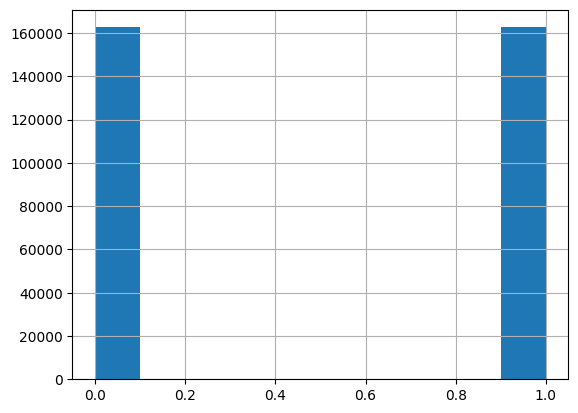

In [27]:
df_balanced['Vulnerability_status'].hist()

In [28]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2819208,NaN,NaN,NaN,return h.this.c();,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return h.this.c();,NaN,NaN,NaN
1,11293731,NaN,NaN,NaN,"arrstring106 = new String[]{""\u041b\u0430\u043...",NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,"arrstring106 = new String[]{""\u041b\u0430\u043...",file,INFO,Hardcoded HTTP url found
2,10568841,NaN,NaN,NaN,catch (Exception iterator2) {,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,catch (Exception iterator2) {,NaN,NaN,NaN
3,8234816,NaN,NaN,NaN,"Log.d(AvrcpService.TAG, ""Adding notification c...",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.d(AvrcpService.TAG, ""user_str"" + botificat...",file,WARNING,Logging found
4,426371,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,System.out.println(strArr[i]);,info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(strArr[i]);,NaN,NaN,NaN


In [29]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [30]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2819208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return h.this.c();,NaN,NaN,NaN
1,11293731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"arrstring106 = new String[]{""\u041b\u0430\u043...",file,INFO,Hardcoded HTTP url found
2,10568841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,catch (Exception iterator2) {,NaN,NaN,NaN
3,8234816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.d(AvrcpService.TAG, ""user_str"" + botificat...",file,WARNING,Logging found
4,426371,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,System.out.println(strArr[i]);,NaN,NaN,NaN
5,1724602,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(f1945d, ""user_str"");",NaN,NaN,NaN
6,10976446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"private static native Object call(long var0, l...",file,WARNING,Insecure functions found
7,5545112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"return "" \nprecision mediump float;varying vec...",NaN,NaN,NaN
8,1325515,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"if (Log.isLoggable(TAG, 2) && loadFromCache !=...",NaN,NaN,NaN
9,9037739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.i((String)""user_str"", (String)""user_str"", ...",file,WARNING,Logging found


In [31]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
325288,13430141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var14.method_708(this.field_2330.method_3870()...,NaN,NaN,NaN
325289,5665796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,mLocationEnableActivityLauncher = registerForA...,NaN,NaN,NaN
325290,13918975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.w(field_876, var1);",file,WARNING,Logging found
325291,8731929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,class_291 var29 = var6;,NaN,NaN,NaN
325292,1214829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,if (allOption != null) {,NaN,NaN,NaN
325293,7924576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"public void b(final View r, final int c) {",NaN,NaN,NaN
325294,8983395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"var5.append(""<rdf:Alt>\n"");",NaN,NaN,NaN
325295,14871448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,if (CapabilitiesHelper.check_browser_available...,file,INFO,Hardcoded HTTP url found
325296,8931900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,var86.onConnected(var1);,NaN,NaN,NaN
325297,12093353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"if (var5.method_225(this, var1) && var3 != 3) {",NaN,NaN,NaN


In [32]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [33]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [34]:
df_balanced.head()

,processed_code,Vulnerability_status
0,return h.this.c();,0
1,"arrstring106 = new String[]{""\u041b\u0430\u043...",1
2,catch (Exception iterator2) {,0
3,"Log.d(AvrcpService.TAG, ""user_str"" + botificat...",1
4,System.out.println(strArr[i]);,1


In [35]:
df_balanced.columns = ['text', 'labels']

In [36]:
df_balanced.head(5)

,text,labels
0,return h.this.c();,0
1,"arrstring106 = new String[]{""\u041b\u0430\u043...",1
2,catch (Exception iterator2) {,0
3,"Log.d(AvrcpService.TAG, ""user_str"" + botificat...",1
4,System.out.println(strArr[i]);,1


In [37]:
df_balanced.head(5)

,text,labels
0,return h.this.c();,0
1,"arrstring106 = new String[]{""\u041b\u0430\u043...",1
2,catch (Exception iterator2) {,0
3,"Log.d(AvrcpService.TAG, ""user_str"" + botificat...",1
4,System.out.println(strArr[i]);,1


In [38]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [39]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [40]:
from datasets import load_dataset, DatasetDict

In [41]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [42]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 325298
    })
})

In [43]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [44]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [45]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 195178
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 65060
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 65060
    })
})

In [46]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/graphcodebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/539 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [47]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [48]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [49]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/195178 [00:00<?, ? examples/s]

Map:   0%|          | 0/65060 [00:00<?, ? examples/s]

Map:   0%|          | 0/65060 [00:00<?, ? examples/s]

In [50]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/graphcodebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
!pip install torchinfo

In [52]:
from torchinfo import summary

In [53]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [54]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [55]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [56]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.8 MB/s eta 0:00:00


In [57]:
import evaluate

In [58]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [59]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-59-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [60]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.129000,0.128411,{'accuracy': 0.9668306178911774},{'recall': 0.9598070245521311},{'precision': 0.9735078697210534},{'f1': 0.9666089001671102}
2,0.124700,0.168510,{'accuracy': 0.9602674454349831},{'recall': 0.973419783056264},{'precision': 0.9484999101742619},{'f1': 0.9607982893799002}
3,0.088300,0.105846,{'accuracy': 0.9732554565016908},{'recall': 0.965614725132901},{'precision': 0.9806210017163364},{'f1': 0.9730600111475816}
4,0.074700,0.104248,{'accuracy': 0.974485090685521},{'recall': 0.973634883077774},{'precision': 0.9753132022039585},{'f1': 0.9744733200061511}


Trainer is attempting to log a value of "{'accuracy': 0.9668306178911774}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9598070245521311}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9735078697210534}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9666089001671102}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9602674454349831}" of type <class 

TrainOutput(global_step=48796, training_loss=0.10709810530575527, metrics={'train_runtime': 17332.448, 'train_samples_per_second': 45.043, 'train_steps_per_second': 2.815, 'total_flos': 2.0541395825221632e+17, 'train_loss': 0.10709810530575527, 'epoch': 4.0})

In [61]:
outcome= trainer.predict(tokenized_datasets['test'])

In [62]:
print(outcome.metrics)

{'test_loss': 0.1064196303486824, 'test_accuracy': {'accuracy': 0.9742852751306487}, 'test_recall': {'recall': 0.9732304205335539}, 'test_precision': {'precision': 0.975471234727083}, 'test_f1': {'f1': 0.9743495392729559}, 'test_runtime': 409.718, 'test_samples_per_second': 158.792, 'test_steps_per_second': 2.482}
